In [1]:
!pip install imbalanced-learn
from sklearn.datasets import make_classification
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
print('建立起資料集')
X,y=make_classification(
  n_samples=100000,n_features=2,n_informative=2,n_redundant=0,
  n_repeated=0,n_classes=2,n_clusters_per_class=1,
  weights=[0.99,0.01],class_sep=0.5,random_state=0
)
print(X.__class__)
print(X)


資料為numpy格式，要轉換為pandas格式
       feature1  feature2  target
0      1.236497  0.579272       0
1     -0.188720 -0.022001       0
2     -0.653844  0.794309       0
3      0.005572  0.593370       0
4      0.482573  0.796902       0
...         ...       ...     ...
99995 -1.377568  0.659066       0
99996 -0.252317  0.346224       0
99997 -0.700496  0.308327       0
99998 -1.638941  0.351496       0
99999 -0.437461  0.574970       0

[100000 rows x 3 columns]
查看資料之間的比例
0    98474
1     1526
Name: target, dtype: int64
0    0.98474
1    0.01526
Name: target, dtype: float64


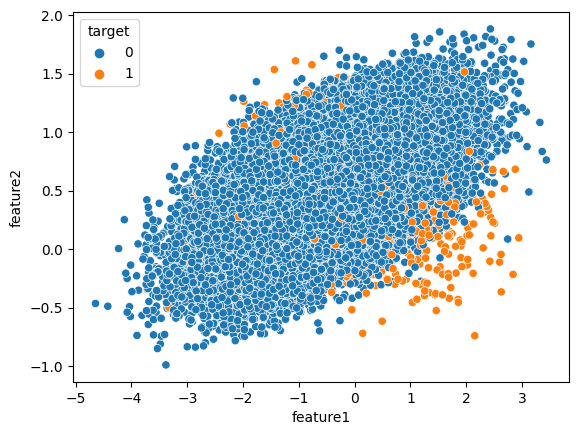

In [5]:
print('資料為numpy格式，要轉換為pandas格式')
df=pd.DataFrame({'feature1':X[:,0],'feature2':X[:,1],'target':y})
print(df)
print('查看資料之間的比例')
print(df['target'].value_counts())
print(df['target'].value_counts(normalize=True))
sns.scatterplot(x='feature1',y='feature2',hue='target',data=df)
plt.show()

In [7]:
print('1-先區分X與y')
print('2-進行資料切割')
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
print('3-開始進行模型訓練')
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=5)
model.fit(X_train,y_train)
print('4-模型訓練後預測')
y_pred=model.predict(X_test)
print('5-模型訓練後評估')
print('分類與迴歸的評估是不同')
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print('準確率:\n',accuracy_score(y_test,y_pred))
print('分類報告:\n',classification_report(y_test,y_pred))
print('混淆矩陣:\n',confusion_matrix(y_test,y_pred))

1-先區分X與y
2-進行資料切割
3-開始進行模型訓練
4-模型訓練後預測
5-模型訓練後評估
分類與迴歸的評估是不同
準確率:
 0.9851666666666666
分類報告:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     29535
           1       0.72      0.07      0.13       465

    accuracy                           0.99     30000
   macro avg       0.85      0.54      0.56     30000
weighted avg       0.98      0.99      0.98     30000

混淆矩陣:
 [[29522    13]
 [  432    33]]


In [8]:
print('載入相關模組')
from imblearn.over_sampling import RandomOverSampler,SMOTE #增加
from imblearn.under_sampling import RandomUnderSampler,NearMiss #減少
print('採樣之後數量統計')
from collections import Counter

載入相關模組
採樣之後數量統計


In [9]:
ros=RandomOverSampler()
print('1-先區分X與y')
print('2-進行資料切割')
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
print('我們要進行轉換')
X_train_ros,y_train_ros=ros.fit_resample(X_train,y_train)
print('查看分類數量')
print(Counter(y_train_ros).items()) #小樣本增加
print(Counter(y_train).items()) #原本

1-先區分X與y
2-進行資料切割
我們要進行轉換
查看分類數量
dict_items([(0, 68929), (1, 68929)])
dict_items([(0, 68929), (1, 1071)])
